# 로지스틱 회귀분석

## LOGIT(Logistic Regression)의 기본 배경

1. 이분법
- 분류의 가장 일반적인 경우로서 두 가지 중 하나를 선택하는 방법
- 우림이가 내일 출근을 할 것인가?(0) 말 것인가(1)

2. 로지스틱 회귀분석
- 값이 연속적인 값을 가지더라도, 함수 결과값이 0~1 사이의 값을 갖도록 설계되어있기 때문에 이분법적인 분류 문제 해결이 쉬움
- 적용 분야 : 기업 부도 예측, 주가-환율-금리 등의 Up/Down 예측

### [실습] 로지스틱 회귀분석 개요

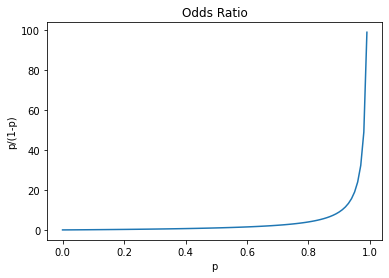

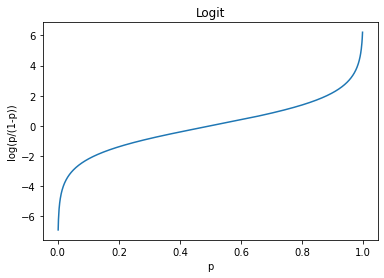

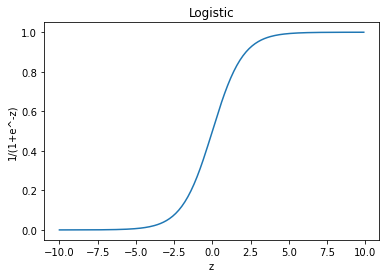

In [2]:
# 1) logit 함수
import numpy as np
import matplotlib.pyplot as plt 
np.random.seed(10)

# 오즈비(odds ratio)
# 성공확률(p)과 실패확률(1-p)의 비율을 나타내는 값
# p / (1-p)
probs = np.arange(0,1,0.01)
odds = [p/(1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.title('Odds Ratio')
plt.show()


# LOGIT 함수
# 오즈비(p/(1-p))에 로그함수를 취해서 만든 함수
# z = log(p/(1-p))
# p = 0.5 => z = 0, p = 0 or 1 => z = -+infinite
probs = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.title('Logit')
plt.show()

# 로지스틱 함수
# logit 함수를 z에 대해 정리한 식으로서 logit 함수의 x, y 축이 바뀐 모양
# p = 1 / (1 + e^-z)
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.title('Logistic')
plt.show()

/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


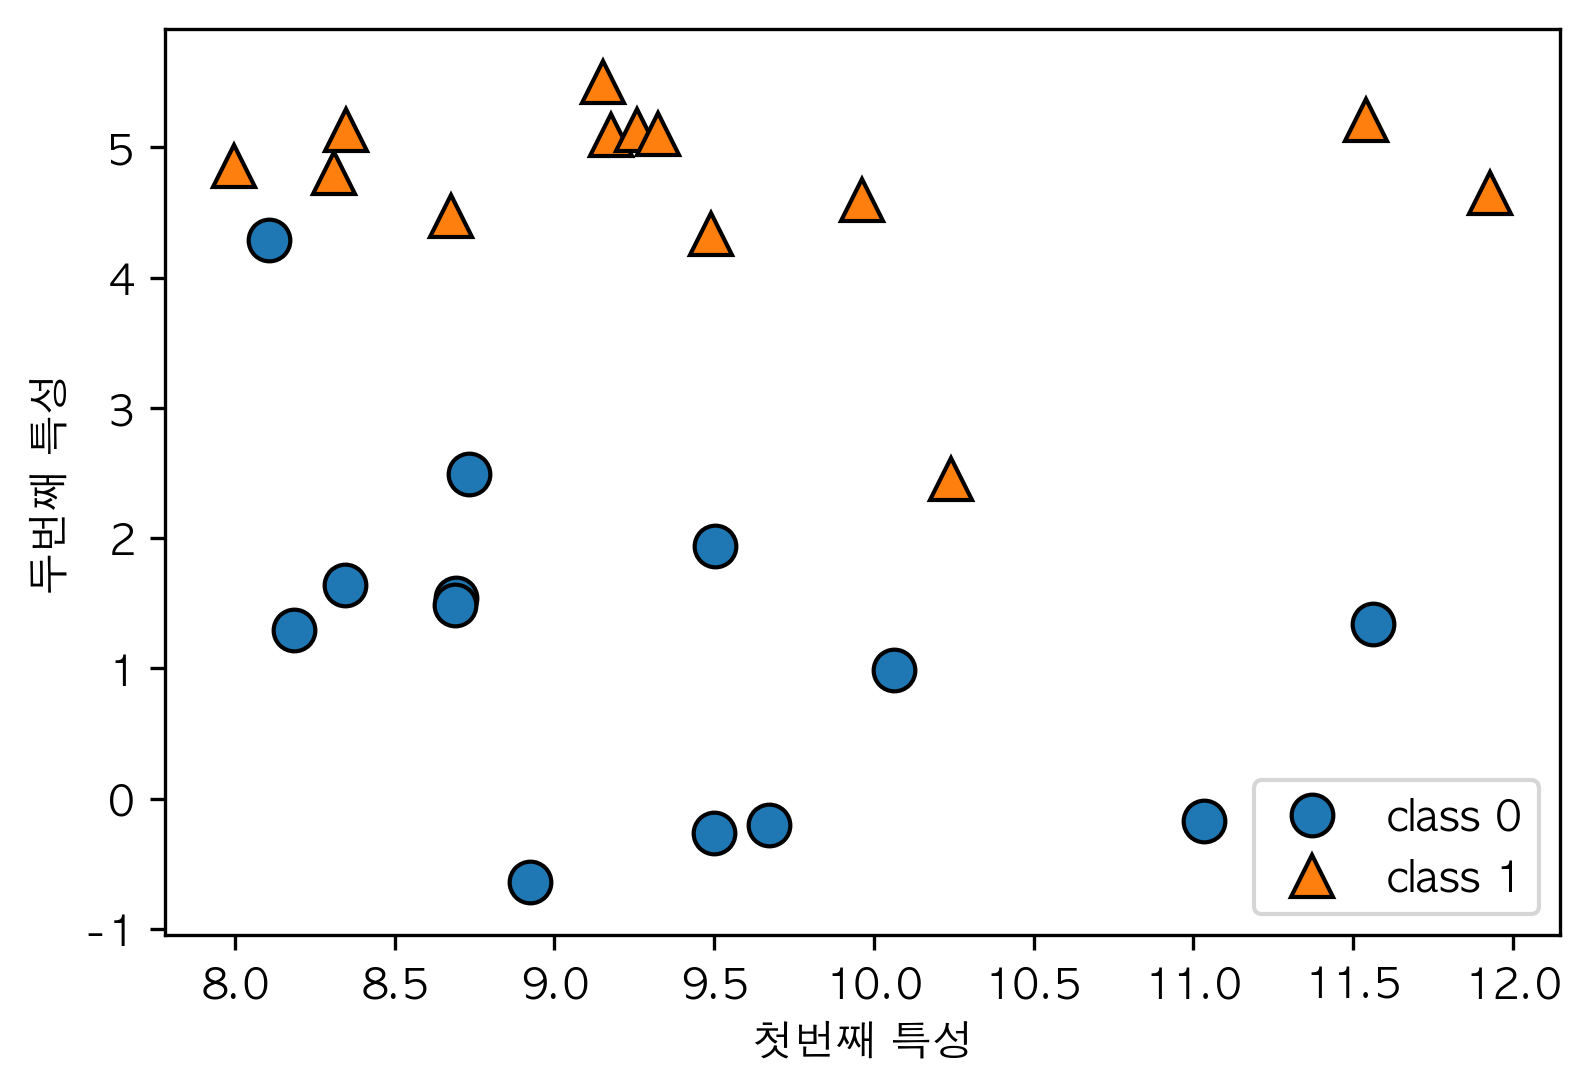

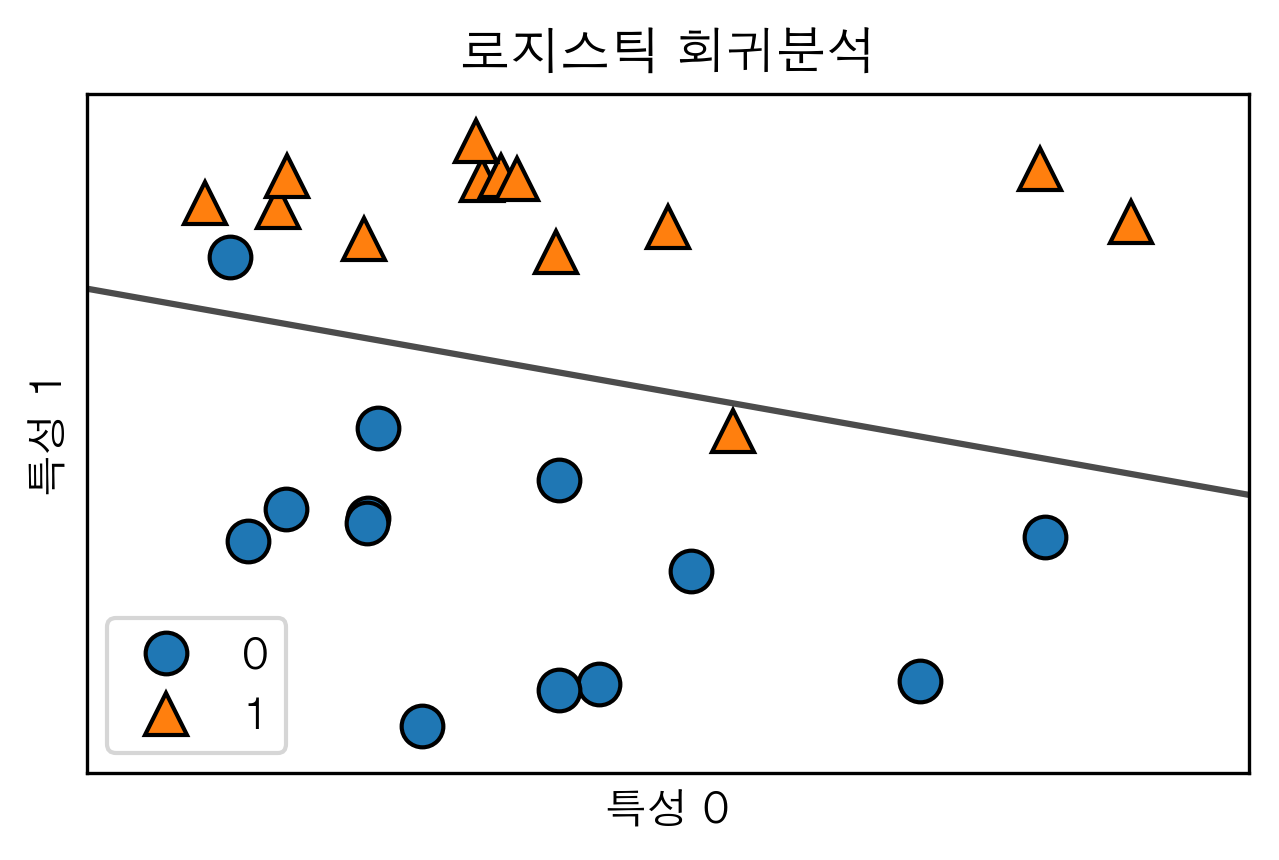

In [4]:
# 2) forge 데이터셋
%matplotlib inline
from matplotlib import pyplot as plt 
import mglearn
from matplotlib import rc
# 한글폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

# forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc = 4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

# 분류형 선형 모델(로지스틱 회귀)
# 💥 로지스틱회귀분석은 분류 알고리즘임 !!! 
from sklearn.linear_model import LogisticRegression
fig, axes = plt.subplots(1,1, figsize=(5,3))
model = LogisticRegression() #모델 선언
model = model.fit(X, y) #모델 학습
mglearn.plots.plot_2d_separator(model, X, fill=False, eps=0.5, ax = axes, alpha=.7)

#산점도 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axes)
axes.set_title("로지스틱 회귀분석")
axes.set_xlabel("특성 0")
axes.set_ylabel("특성 1")
axes.legend()

# 결정경계는 직선으로 표시되었고, 포인트 2개 빼고 제대로 분류함!


(-0.1, 1.1)

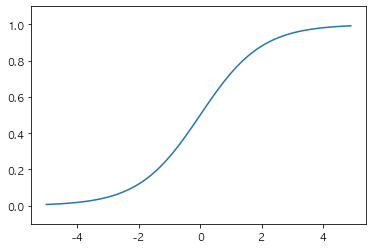

In [5]:
# 3) 로지스틱 함수
# Sigmoid 함수의 일종
# 0.0 ~ 1.0 사이의 실수값
%matplotlib inline
import matplotlib.pylab as plt 

# Sigmoid 함수 : S자 모양의 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
X = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(X)
plt.plot(X, y)
plt.ylim(-0.1, 1.1)

### 로지스틱 회귀모델 파라미터
* n_samples : 표본 데이터의 수, 디폴트 100
* n_features : 독립 변수의 수, 디폴트 20
* n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
* n_informative : 독립 변수 중 종속 변수와 상관관계가 있는 성분의 수, 디폴트 2
* n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
* random_state : 난수 발생 시드


Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.7658
Time:                        15:49:40   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919
0 1 0 1 0 

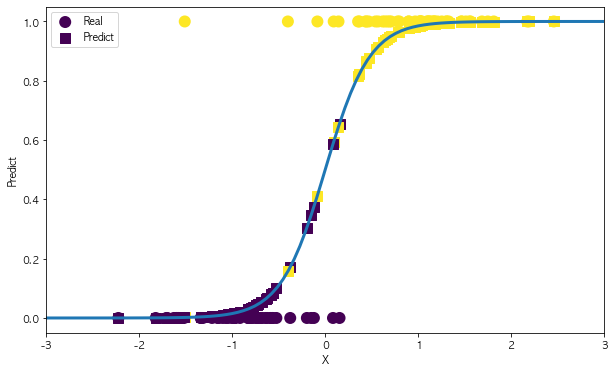

In [10]:
from sklearn.datasets import make_classification
import statsmodels.api as sm

X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class = 1, random_state=4)
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

#예측값: 0.0~1.0 사이의 실수값
# 0.5 이상이면 1, 미만이면 0으로 분류
result = logit_res.predict(X)[:5]
for a in result:
    print(int(round(a)), end=' ')

xx = np.linspace(-3, 3, 100)
pred = logit_res.predict(xx)
plt.figure(figsize=(10, 6))
plt.plot(xx, pred, lw=3) #lw : line width
plt.scatter(X, y, c=y, s=100, lw=2, label = 'Real')
plt.scatter(X, logit_res.predict(X), label= 'Predict', marker='s', c=y, s=100, lw=1)
plt.xlim(-3, 3)
plt.xlabel('X')
plt.ylabel('Predict')
plt.legend()

### 로지스틱 회귀 모형의 성능 측정
- log_loss()
    * 로그 손실값 : 분류 모형의 성능을 평가할 때 사용하는 값
    * 100% 확률로 답을 구함 => -log(1.0) = 0
    * 80% 확률로 답을 구함 => -log(0.8) = 0.22314
    * 확률⬇️ = log loss⬆️⬆️⬆️

In [11]:
# 로지스틱 회귀 모형 성능 측정
from sklearn.metrics import log_loss

y_hat = logit_res.predict(X)
log_loss(y, y_hat, normalize=False) #normalize : 정규화 여부

# 실제 y값의 평균
mu_null = np.sum(y) / len(y)

# 실제 y값의 평균으로 계산한 로그 손실값
y_null = np.ones_like(y) * mu_null

log_loss(y, y_null, normalize=False)

# 결정계수값 (Pseudo R-squ.)
1- (log_loss(y, y_hat) / log_loss(y, y_null))


0.7658389667520492

In [14]:
# 사이킷런 패키지의 로지스틱 회귀분석 모델 사용하기

# 학습용, 검증용 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# sklearn 의 LogisticRegression()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

print(model.classes_) #출력값
print(model.intercept_) #절편
print(model.coef_) #회귀계수

print(model.predict_proba(X_test)) #0일 확률, 1일 확률
print(model.predict(X_test))

# 성능 측정
model.score(X_test, y_test)


[0 1]
[0.01210487]
[[2.99972644]]
[[0.00935192 0.99064808]
 [0.00428094 0.99571906]
 [0.98204208 0.01795792]
 [0.11773589 0.88226411]
 [0.10564409 0.89435591]
 [0.94862134 0.05137866]
 [0.9892088  0.0107912 ]
 [0.13379119 0.86620881]
 [0.00138017 0.99861983]
 [0.84331206 0.15668794]
 [0.8996786  0.1003214 ]
 [0.94798802 0.05201198]
 [0.91098884 0.08901116]
 [0.25466241 0.74533759]
 [0.04540992 0.95459008]
 [0.96422105 0.03577895]
 [0.99385324 0.00614676]
 [0.88332811 0.11667189]
 [0.85162766 0.14837234]
 [0.03287681 0.96712319]]
[1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1]


0.95

[[10  0]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


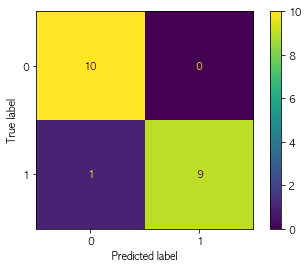

In [20]:
# confusion metrix 확인
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, model.predict(X_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)


#### 불균형 데이터셋 처리 : 샘플링
- 샘플링이 필요한 이유 : 
    * 데이터가 불균형한 분포를 가지는 경우, 큰 비율을 택하는 모형의 정확도가 높아져, 예측 정확도가 떨어질 수 있음
    * 소수 클래스의 경우 정확도는 높지만, 재현율(recall)이 작아질 수 있음
- 언더 샘플링
    * 높은 비율을 차지하는 **다수 집단에서** **일부만 샘플링**하는 방법
    * 단점 : 학습에 사용되는 전체 데이터 수가 손실되고, 중요한 특성을 가진 데이터를 잃을 경우로 인해 오히려 성능이 떨어질 수 있음
    - 종류
        * RandomUnderSampler(random_state=0)
            * 무작위로 다수 클래스의 데이터를 없애는 단순 샘플링
        * TomekLinks(sampling_strategy='언더샘플링방법')
            * 토멕링크(Tomek's link) : 서로 다른 클래스에 속하는 한쌍의 데이터
            * 원리 : 토멕링크 중에서 다수 클래스에 속한 샘플을 제거함으로써 데이터 균형을 맞춤
            * 언더샘플링방법
                * 'majority' : 다수 클래스의 샘플 제거
                * 'not minority' : 소수 클래스 제외하고 샘플링
                * 'not majority' : 다수 클래스 제외하고 샘플링
                * 'all' : 모든 클래스를 샘플링
                * 'auto' : 'not minority' 와 같음 (기본 옵션)
        * CondenseNearestNeighbour(random_state=0)
            * CNN 
            * 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법
            * 다수의 데이터 중에서 하나를 골라서 최근접 이웃이 다수 클래스이면 그 샘플을 빼는 방식
            * 단점 : 시간이 많이걸리고, 1:1로 맞춰지지 않음
        * OneSidedSelection(random_state=0)
            * 토멕링크 방식과 Condensed Nearest Neighbour 방식을 섞음
            * 토멕링크 중 다수 클래스 샘플을 제거하고, 나머지 데이터 중에서 서로 붙어있는 다수 클래스 데이터는 1-NN 방법으로 제외하는 방식
        * EditedNearestNeighbours(kind_sel="모두 또는 다수", n_neighbours=K)
            * ENN
            * 원리 : 다수 클래스 데이터 중 소수 클래스와 가장 가까운 K(n_neighbors)개의 데이터가 모두 또는 다수 클래스가 아닐 경우 삭제하는 방식
            * 소수 클래스 주변의 다수 클래스 데이터가 삭제됨
            * kind_sel
                * all : 모두, mode : 다수
        * NeighbourhoodCleaningRule(kind_sel="모두 또는 다수", n_neighbours=K)
            * CNN(Condensed Nearest Neighbour) 방식과 ENN(Edited Nearest Neighbours) 방법을 섞은 것


- 오버 샘플링
    * 낮은 비율을 차지하는 **소수 집단에서 복원 추출**을 수행하는 방법
    * 중요
        * 데이터를 생성하는 방법 => 정밀도의 감소율 ⬇️, 재현율의 증가율 ⬆️ 방법 고려
    - 종류
        * RandomOverSampler(random_state=0)
            * 무작위로 소수 클래스의 데이터를 복제하여 늘리는 방식
            * 정보가 손실되지 않으나 과적합이 될 수 있음
        * ADASYN(random_state=0)
            * Adaptive Synthetic Sampling
            * 소수 클래스 데이터와 그 데이터에서 가장 가까운 k개의 소수 클래스 데이터 중 무작위로 선택된 데이터 사이의 직선상에 가상의 소수 클래스 데이터를 만드는 방법
        * SMOTE(random_state = 0)
            * Synthetic Minority Over-sampling Technique
            * 낮은 비율 클래스 데이터들의 **최근접 이웃 데이터**를 이용하여 일정 거리 떨어진 위치에 새로운 데이터를 생성함
            * 원리
                1. 소수 클래스 샘플의 k 최근접 이웃을 찾음
                2. 현재 샘플과 k개 이웃간의 거리 구하기
                3. 거리에 0~1 사이의 임의값을 곱해 소수 클래스 샘플에 추가함
            * 방법 : 소수 클래스의 샘플을 주변 이웃을 고려해 약간씩 이동시킨 포인트들을 추가하는 방식

- 복합 샘플링
    * 언더 샘플링과 오버 샘플링 방식을 혼합
    - 종류
        * SMOTEENN(random_state=0)
            * SMOTE(오버 샘플링 - 주변 이웃 고려해 약간씩 이동시킨 포인트 추가) + ENN(언더 샘플링 - 소수 클래스 주변 다수 클래스 삭제)
        * SMOTETomek(Random_state=0)
            * SMOTE(오버 샘플링 - 주변 이웃 고려해 약간씩 이동시킨 포인트 추가) + Tomek(언더 샘플링 - 토멕링크 중에서 다수 클래스 샘플들을 제거)

#### 지표
- Accuracy(정확도)
- Support(지지도) : 실제 값의 개수
- Macro avg(단순 평균) : 모든 클래스를 동일한 비중으로 고려함
- Weighted avg(가중평균)
    * f1-score과 같은 값
    * 각 클래스에 속하는 표본의 갯수
- Precision(정밀도)
    * **모델이 True로 분류한 것** 중에서 <span style="color:red">**실제 True의 비율**</span>
    * 관점 : **model**의 입장
    * tp / (tp + fp)
- Recall(재현율)
    * **실제 값이 True인 것** 중에서 <span style="color:red">**모델이 True라고 예측한 것**</span>의 비율
    * 관점 :**실제** 정답의 입장
    * 일반적으로, precision과 recall 반비례 관계
    * tp / (tp + fn)
- F1
    * Precision과 Recall의 조화평균
    * 불균형 데이터셋에 많이 사용하는 평가 지표
    * (2 * precision * recall) / (precision + recall)
- Confusion Matrix
    - TN, FP, FN, TP
        * TN(True Negative) : 0을 0으로 맞춤
        * FP(False Positive) : 0을 1로 틀림
        * FN(False Negative) : 1을 0으로 틀림
        * TP(True Positive) : 1을 1로 맞춤

#### 로지스틱회귀 모델의 하이퍼 파라미터
- random_state
    - 모델을 재현하기 위해 난수를 고정시키는 옵션
- C (Cost, Cost Function)
    - 제약 조건의 강도를 설정하는 하이퍼 파라미터
    - 기본값 1.0
    - Cost ⬆️ => ⬇️ 제약조건 강도 => 과대적합
    - Cost ⬇️ => ⬆️ 제약조건 강도 => 과소적합
    - 실험을 통해 최적의 Cost 값을 얻어내야함
- class_weight(가중치)
    - 기본 옵션 : 모든 클래스에 1이 부여됨
    - class_weight = 'balanced'
        * 샘플 갯수에 반비례하는 가중치가 곱해짐
        * y값에 반비례하는 가중치를 n_samples / (n_classes * np.bincount(y))로 자동 조정
    - class_weight = {0:3,1:1, 2:2}
        * 가중치를 직접 입력하는 옵션
- penalty(제약 조건)
    - 제약 조건
        - 회귀계수들이 학습용 데이터에 과적합되지 않도록 정규화 요소를 더해주는 기법
        - 과적합 발생 위험이 있는 수치에 Penalty를 부여하는 방식
    - 값
        - l1
            * LASSO (Least Absolute Shrinkage Selector Operator) Penalty
            * 개념 : 오차 절대값에 페널티를 부여함 
            * 가정 : 변수들이 많을 경우 실질적으로 영향을 미치는 변수 개수가 적을 것이라고 가정
            * 방법 : 영향이 적은 변수들을 0으로 보내서 없애고, **영향력이 큰 변수**들만 선택
            * 장점 : 모형을 단순화시켜 해석이 쉬움
        - l2
            * Ridge Penalty
            * 개념 : 오차를 제곱한 값에 페널티를 부여하는 방식으로, 일반적으로 사용하는 방식
            * 가정 : 변수들 간의 공선성 구조가 있을 경우, 변수는 많지만 실제 사용가능한 정보는 적음
            * 장점 : 변수들간의 **분산을 감소**시키는 기능
        - elasticnet
            * LASSO와 Ridge의 혼합형
            * **변수와 분산을 모두** 줄이고 싶은 경우 사용
        - none
            * penalty를 사용하지 않음
- solver
    * 최적화(최적의 가중치를 설정)에 사용할 알고리즘
    * Ex
        * lbfgs(Limited Memory Broyden Fletcher Goldfarb Shanno)가 기본 값
        * small dataset : liblinear
        * big dataset : sag(Stochastic Average Gradient descent), saga(Variant of Sga)
        * multi class 지원 : newton-cg, saga, lbfgs

#### [실습] 데이터 전처리 자동화 & 교차검증

In [25]:
# 라이브러리 불러오기
import pandas as pd
from sklearn.datasets import fetch_openml

# 데이터셋 불러오기
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
df = pd.concat([X,y], axis=1)
df

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,0
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None,0
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,0
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,0


In [26]:
# 컬럼 확인하기
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived'],
      dtype='object')

In [27]:
# 독립 변수와 종속 변수 나누기
train_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']

X = df[train_cols] #독립변수
y = df["survived"] #종속변수

y.value_counts()


0    809
1    500
Name: survived, dtype: int64

/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='survived', ylabel='count'>

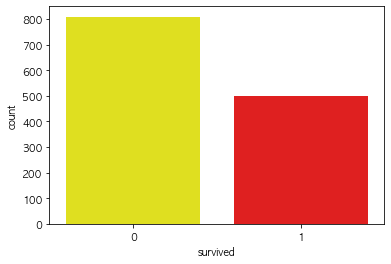

In [28]:
# 불균형 데이터 확인
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]

sns.countplot('survived', data=df, palette=colors)


/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


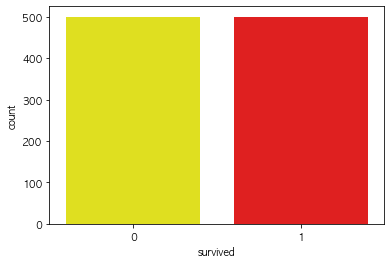

In [33]:
# 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

# 언더샘플링 훈련
X_sample, y_sample = RandomUnderSampler(random_state = 0).fit_resample(X, y)


# 데이터프레임으로 형식 변환
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['survived'])
df2 = pd.concat([X_samp, y_samp], axis=1)

#형식 변환 후 다시 독립변수, 종속변수에 적용
X = df2[train_cols]
y = df2["survived"]
y.value_counts()

colors = ["yellow", "red"]
sns.countplot('survived', data=df2, palette=colors)

X = X_samp[train_cols]
y = y_samp["survived"]

In [34]:
# 데이터 전처리 자동화
# 연속된 변환을 순서대로 처리하는 클래스
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

#결측값 처리 - 나이, 요금 (중위수로 처리)
numeric_features = ['age','fare']
numeric_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
]) #SimpleImputer(): 결측값 채우기 #StandardScaler() : 평균 0, 분산 1로 조정함

#범주형 변수 - 원핫 인코딩
# handle_unknown = 'ignore' : 변환 중 에러 발생할 경우 무시하고 계속 진행
categorical_features = ['embarked','sex','pclass']
catrgorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 연속형인지 범주형인지에 따라 전처리 진행
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_tranformer, numeric_features),
        ('cat', catrgorical_transformer, categorical_features)
    ]
)

In [35]:
# 전처리 후 로지스틱 회귀분석 분류모형
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())
])
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'se

In [36]:
# Train, Test 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) #stratify: default=None으로, stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해줌 (한 쪽에 쏠려서 분배되는 것을 방지) 

# 전처리 모델 학습
clf.fit(X_train, y_train)

# 성능확인
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.76625
0.775


0.7540000000000001
0.7540000000000001
{'classifier__C': 0.1, 'preprocessor__num__imputer__strategy': 'mean'}


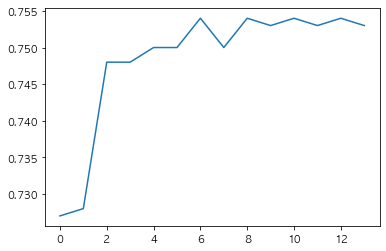

In [37]:
# 교차검증과 모형의 튜닝
# 하이퍼파라미터 최적화
from sklearn.model_selection import GridSearchCV

# 숫자 결측값 처리
# Cost : penalty 강도 조절

#하이퍼 파라미터 범위
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C' : [0.0001, 0.001, 0.01, 0.1, 1.0 , 10, 100],
}

# 교차검증 모델 선언 및 학습
grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search.fit(X, y)

grid_search.cv_results_["params"]

scores = grid_search.cv_results_["mean_test_score"]
scores

print(max(scores))
plt.plot(scores)

print(grid_search.best_score_) #최고 하이퍼 파라미터 조합을 사용 했을 때 정확도
print(grid_search.best_params_) # 최고 하이퍼파라미터 조합 알려줌

#### [실습] Cancer 데이터

In [38]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

# Cancer 데이터셋 불러오기
cancer = load_breast_cancer()

# 데이터셋으로 변환
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))

#상위 5개 행 확인
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [39]:
# 컬럼 확인
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [40]:
# 행렬 개수 확인
df.shape

(569, 31)

In [41]:
# 기초통계량 확인
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [42]:
# 분류를 기준으로 한 평균값들
df.groupby("target").mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [43]:
# 악성(0) & 양성(1) 개수 확인
df["target"].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

/Users/rileyko/opt/anaconda3/envs/riley/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '분류\n (0.0 : 악성, 1.0: 양성)')

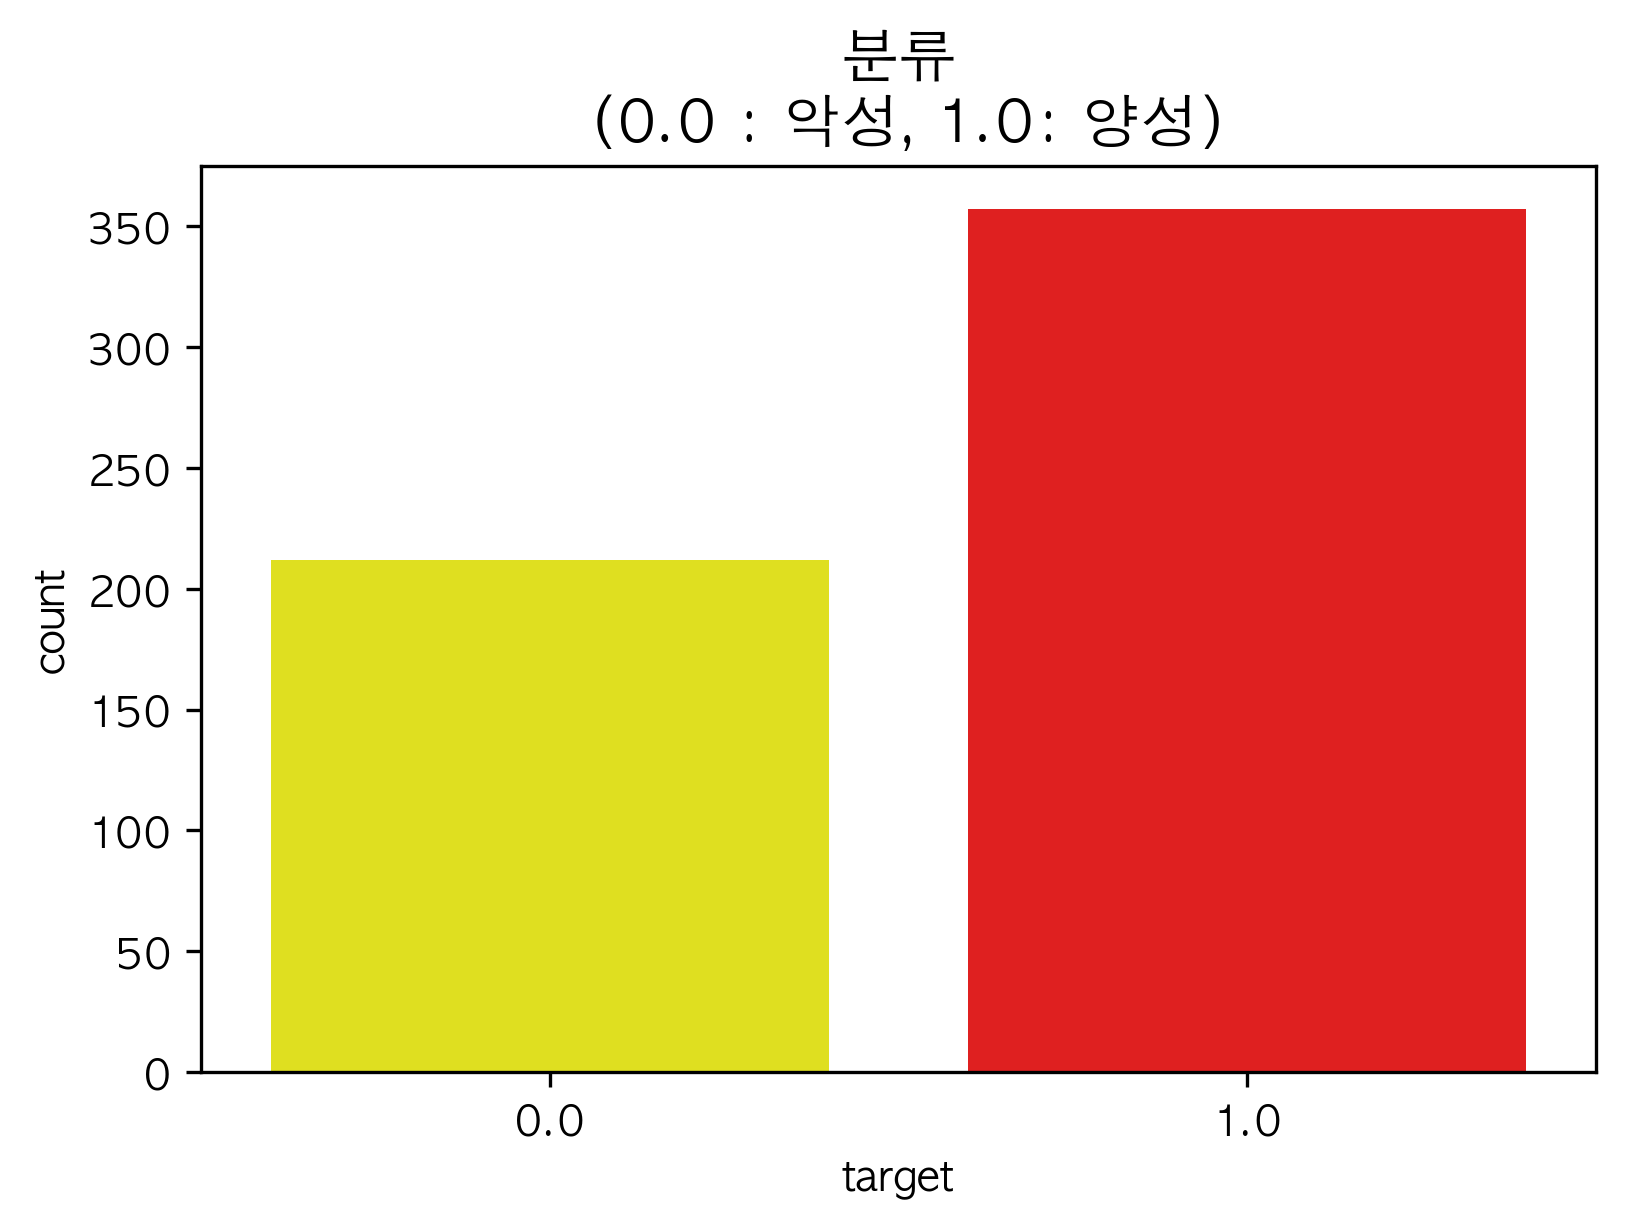

In [45]:
# 분류 시각화
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import rc
%matplotlib inline

# 한글폰트 설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

colors = ["yellow", "red"]

sns.countplot('target', data=df, palette=colors)
plt.title("분류\n (0.0 : 악성, 1.0: 양성)", fontsize = 14)